# Introduction
This document is a jupyter notebook. You can open it in Jupyter lab to check and run it, or read along the pdf version. In the next paragraphs, it will guide you to install and run Jupyter Lab, and to run casandra from your own notebooks.

# Installation

In order to run the python version of Casandra, you will need a Python environment runing in your computer. Even a final version with a graphical interface, etc. will need python to run. This is why the same code can run on any platform.

The easiest way to install and maintain a python environment is to download the Anaconda distribution from https://www.anaconda.com/distribution Choose Python 3.7 version.

Then, unzip the casndra folder (provided by email) and copy it somewhere in your system.

# Jupyter lab
Once installed run the Anaconda navigator and use it to open Juoyter lab
![Anaconda navigator](/Users/MIMAT_JB/Desktop/Github/pyCasandra/Documents/screen_captures/Anaconda_NAvigator.png)

Jupyter lab is a juppyter notebook editor. On the left, you have a file tree-view to navigate the file system. Use it to go to the casandra folder that ypu copied to your computer.

On the right, you have a series of tabs contaning your open documents and the launcher (see below). Depending on which packages you have installes, you may have more or less options for file types and languages.

Select a Python3 notebook:
![Juoyter notebook new](/Users/MIMAT_JB/Desktop/Github/pyCasandra/Documents/screen_captures/JN_start.png)



This will create a new file and open it in a new tab. By default, the new file will have a name like Untitled1. Right click on the tab to open a context menu and select Rename File. The file of the name will be the title of the document when you export it as pdf.
![Rename file](/Users/MIMAT_JB/Desktop/Github/pyCasandra/Documents/screen_captures/ipnb_rename.png)

The new document contains an empty cell. By default, the cells are Code cells. You can make them text cells by slecting Markdown from the pull down menu.

Each cell contains instructions that get executed by pressing shift + enter with the cell selected. Code cells will contain the input and output. Markdown cells will be rendered as text.

To see the code of a cell again, double click it.

## Markdown
Markdown is a text markup language that you can use to specify titles, *italics*, **bold**, etc. You can check the syntax here: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

![Rename file](screen_captures/text_rendered.png)


# Coding in python

You can think as code cells as diferent views of an interpreter session. All cells in a document share the same state. Variables defined in a cell are known to all cells, above or below. This means that if you change the value of a variable and re-run a previous cell, it will use the new value.

## Hello World
The simplest program, written in a code cell:

In [1]:
print('Hello world')

Hello world


## Importing modules and name_scopes
in order to expand functionality, you can import modules. THis makes the module contents (functions, global variables, etc.) available to your session. The syntax of interest is:
```python 
import module_name as alias
```

If module_name is a standard library odule, it will reside in the search path and will be found. If it is a custom module (like pysputt, where Casandra lives), it must be *in the same folder as the notebook*, or you need to play some system tricks.

Let's try this with the mtaplotlib.pyplot module, which provides tools to generate Matlab-style plots:

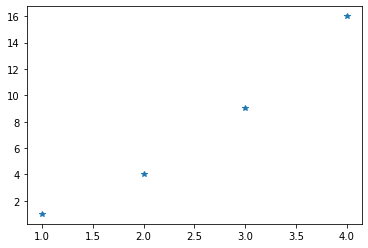

In [2]:
import matplotlib.pyplot as plt
x=[1,2,3,4]
y=[1,4,9,16]
plt.plot(x,y,'*')

The first line imports the module and assigns it to the plt alieas.

The next two lines define x and y as lists containing 4 values each.

The last line calls creates the plot. The dot (operator) tells the interpreter to look for the plot function inside plt, which we previously defined as the matplotlib.pyplot module. Then, we pass the x and y variables to define the data points, and a text string to define the kind of plot: a scatter plot suing asterisks as data markers.

## Using Casandra

We need to import three modules:
* numpy gives us tools to work with vectors an matrices, may come useful to do calculations on results
* matplotlib.pyplot to plot results. (We have already imported it a couple of cells above, so we do not need to import it again, but we can anyway)
* pysputt: the Casandra core

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pysputt as ps

### Defining the input
The input for the calculation is stored in a CalcInput object. Objects are structures that contain variables (called members) and functions (called methods). Typically, you use the object variables to control the behavior of its functions.

First, we define/declare input_data as a CalcInput object. Remember that CalcInput is defined in the pysputt module, which we imported as ps. Therefore, we need to qualify it as ps.CalcInput: 

In [4]:
input_data = ps.CalcInput()

Inside input_data are a series of variables containing the inputs of the calculation. We can access them with the dot operator, and assign values as below.

The # character indicates a comment. Everything after it in a line is ignored.

In [5]:
input_data.Gas_symbol = 'Ar'
input_data.MG = 39.948 #atomic mass
input_data.ZG = 18 #atomic number
input_data.RG = 0.98 # atomic radius
input_data.UG = 5 #
input_data.QG = 1
input_data.DENG = 5
input_data.KAPA = 0.0002

input_data.Target_symbol= 'Si'
input_data.MA = 28 #atomic mass
input_data.ZA = 14
input_data.RA = 2
input_data.U0 = 4.63
input_data.QZ = 0.75
input_data.DEN = 2.33

input_data.disch_volt = 100.
input_data.disch_cur = 1.1
input_data.pres = 1.2
input_data.Eavg = 10.
input_data.T0 = 300.

input_data.Tcorrect = False

input_data.in_rad = 20
input_data.out_rad = 30
input_data.dist = 150
input_data.L5 = 2
input_data.N1 = 10
input_data.N2 = 20
input_data.grid_R2 = 2

### Runing the calculation
The calculation is contained in a Sputt_plan_circ object. The name stands for Sputter plane circular target. We can create other calculation objects to handle different geometries.

To create a calculation, we define a variable of type Sputt_plan_circ, as we defined a CalcInput above. In this case, we need to pass a CalcInput variable (input_data) to indicate the input to the calculation.

In [6]:
calc_sput = ps.Sputt_plan_circ(input_data)

When creating the variable, the calculation is run. The results are contained as members of the newly created variable. For example, the total deposition rate is in the DEP! variable:

In [7]:
calc_sput.DEP1

array([0.0270664 , 0.02705489, 0.02702039, 0.026963  , 0.02688292,
       0.02678038, 0.02665571, 0.0265093 , 0.0263416 , 0.02615311,
       0.02594442, 0.02571616, 0.02546899, 0.02520366, 0.02492094,
       0.02462163, 0.02430659, 0.0239767 , 0.02363287, 0.02327601,
       0.02290709, 0.02252704, 0.02213685, 0.02173747, 0.02132987,
       0.02091501, 0.02049385, 0.02006732, 0.01963634, 0.01920182,
       0.01876463])

And the radial coordinate on the substrate is in calc_sput.DEP1.

To plot these, call the plot function as above. We can use other plt commands to enhance the plot:


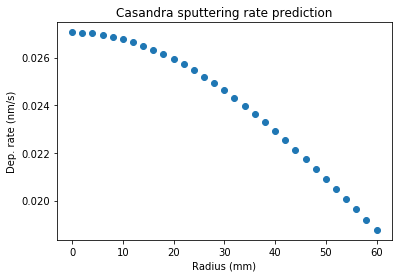

In [8]:
plt.plot(calc_sput.pR, calc_sput.DEP1,'o')
plt.xlabel('Radius (mm)')
plt.ylabel('Dep. rate (nm/s)')
plt.title('Casandra sputtering rate prediction');

Tabulating and saving to files is a little trickier. In the next cell, I will define a couple of helper functions. For the time being, feel free to copy to your notebooks:

In [9]:
def tabulate(x,y):
    retstr=''
    for n in range(len(x)):
        line = str(x[n]) + '\t' + str(y[n]) 
        print(line)
        retstr += line + '\n'
    return(retstr)

def save(s,y, file_name):
    with open(file_name, 'w') as ofile:
        ofile.write(tabulate(x,y))
    return



For example:

In [10]:
tabulate(calc_sput.pR, calc_sput.DEP1);

0	0.02706640246343019
2	0.02705488940190003
4	0.027020386453798326
6	0.026963002110350628
8	0.026882916464740128
10	0.02678038013059788
12	0.026655712741377235
14	0.026509301043933436
16	0.02634159660319919
18	0.026153113138239058
20	0.02594442351314469
22	0.025716156409161268
24	0.025468992707079845
26	0.02520366161125856
28	0.024920936548618135
30	0.024621630877570414
32	0.024306593443059812
34	0.023976704014712656
36	0.023632868645487866
38	0.023276014988198767
40	0.022907087606835443
42	0.022527043318765788
44	0.022136846602649606
46	0.021737465105284664
48	0.021329865278645523
50	0.020915008176109348
52	0.020493845434326727
54	0.020067315464432932
56	0.019636339873352233
58	0.019201820132873307
60	0.018764634511015867
